In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
p = np.load('p_val.npy')
s = np.load('s_val.npy')
g = np.load('g_val.npy')
pe = np.load('pe_val.npy')
se = np.load('se_val.npy')
ge = np.load('ge_val.npy')
n = 5
pe = pe[n:]
se = se[n:]
ge = ge[n:]
print(len(pe))
# for i in range(len(pe)-1, 0, -1):
#   pe[i] -= pe[i-1]
#   ge[i] -= ge[i-1]
  


295


In [2]:
N = 300/(len(p))
def format_func(value, tick_number):
    return int(value*N)

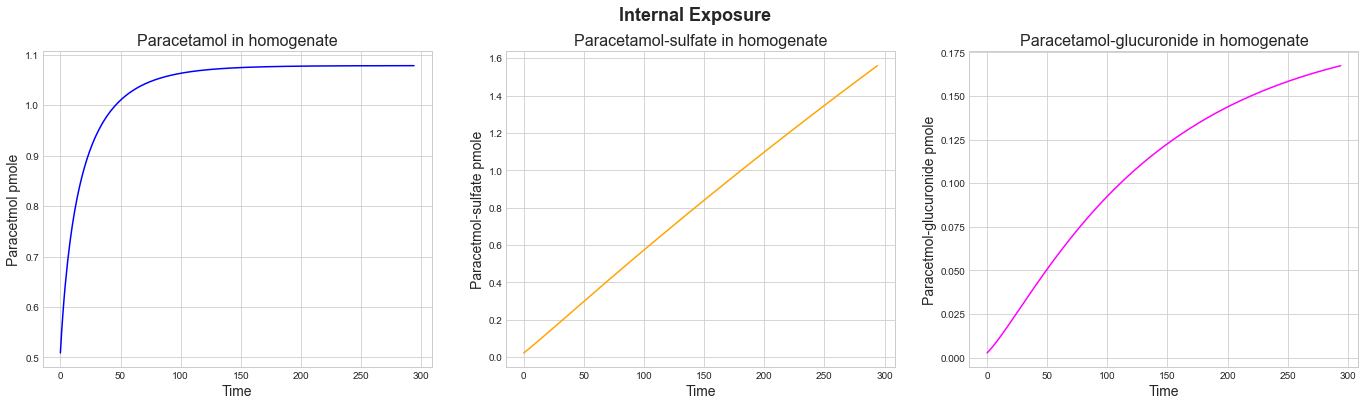

In [3]:
fig, axis = plt.subplots(1,3, figsize=(20,6))
fig.tight_layout(pad=5.0)
fig.suptitle('Internal Exposure', fontsize=18, fontweight='bold')
# Paracetamol
axis[0].set_title('Paracetamol in homogenate', size=16)
axis[0].plot(pe, color='blue')
axis[0].set_xlabel('Time',  fontsize=14)
axis[0].set_ylabel('Paracetamol pmole',  fontsize=14)
# Paracetamol-sulfate
axis[1].set_title('Paracetamol-sulfate in homogenate',size=16)
axis[1].plot(se, color='orange')
axis[1].set_xlabel('Time', fontsize=14)
axis[1].set_ylabel('Paracetamol-sulfate pmole', size=14)
# Paracetamol-glucuronide
axis[2].set_title('Paracetamol-glucuronide in homogenate', size=16)
axis[2].plot(ge, color='magenta')
axis[2].set_xlabel('Time', fontsize=14)
axis[2].set_ylabel('Paracetamol-glucuronide pmole', fontsize=14)
# Tick setting
axis[0].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axis[1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axis[2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

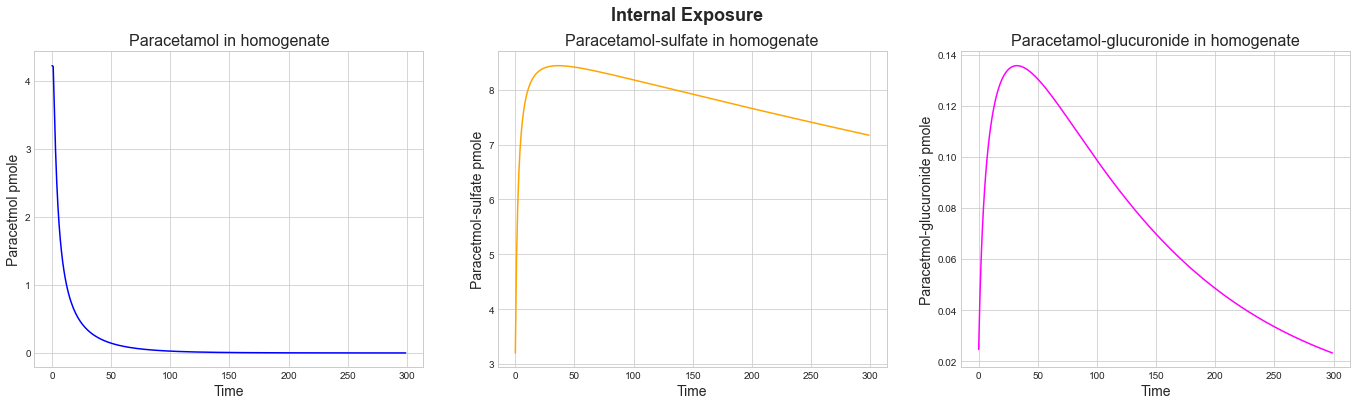

In [4]:
fig, axis = plt.subplots(1,3, figsize=(20,6))
fig.tight_layout(pad=5.0)
fig.suptitle('Internal Exposure', fontsize=18, fontweight='bold')
# Paracetamol
axis[0].set_title('Paracetamol in homogenate', size=16)
axis[0].plot(p, color='blue')
axis[0].set_xlabel('Time',  fontsize=14)
axis[0].set_ylabel('Paracetmol pmole',  fontsize=14)
# Paracetamol-sulfate
axis[1].set_title('Paracetamol-sulfate in homogenate',size=16)
axis[1].plot(s, color='orange')
axis[1].set_xlabel('Time', fontsize=14)
axis[1].set_ylabel('Paracetmol-sulfate pmole', size=14)
# Paracetamol-glucuronide
axis[2].set_title('Paracetamol-glucuronide in homogenate', size=16)
axis[2].plot(g, color='magenta')
axis[2].set_xlabel('Time', fontsize=14)
axis[2].set_ylabel('Paracetamol-glucuronide pmole', fontsize=14)
# Tick setting
axis[0].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axis[1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axis[2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()